In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

In [2]:
def lstsq_opt(x, f, rcond=None):
    x = np.array([x]).T if len(x.shape) <= 1 else x
    f = np.array([f]).T if len(f.shape) <= 1 else f
    A, res, rank, svals = np.linalg.lstsq(x, f, rcond=rcond)
    return A

def MSE(est, tru):
    return np.mean(np.linalg.norm(est-tru,axis=1)**2)


class RBF():
    def __init__(self, x, f, L, eps):
        x = np.array([x]).T if len(x.shape) <= 1 else x
        self.eps = eps
        self.L = L
        idx = sorted(np.random.choice(len(x), L, replace=False))
        self.xx = x[idx]
        ff = f[idx]
        phi = self._phi(self.xx)
        self.C = lstsq_opt(phi, ff)
    
    def predict(self, x):
        x = np.array([x]).T if len(x.shape) <= 1 else x
        phi = self._phi(x)
        return self.C.T@phi
            
    def _phi(self, x):
        phi = np.zeros((self.L,len(x)))
        for i in range(self.L):
            phi[i] = np.exp(-np.linalg.norm(self.xx[i]-x, axis=1)**2/self.eps**2)
        return phi

## Function approximation

### Linear

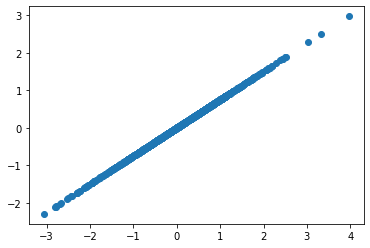

In [3]:
xA, fA = np.genfromtxt('linear_function_data.txt').T
plt.scatter(xA,fA)

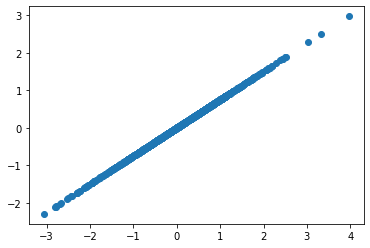

In [4]:
fAhat = lstsq_opt(xA, fA)*xA
plt.scatter(xA,fAhat)

### Non-linear

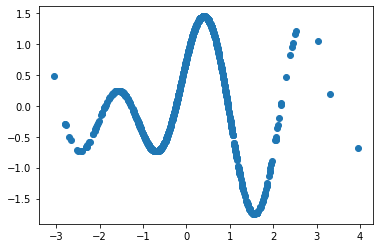

In [5]:
xB, fB = np.genfromtxt('nonlinear_function_data.txt').T
plt.scatter(xB,fB)

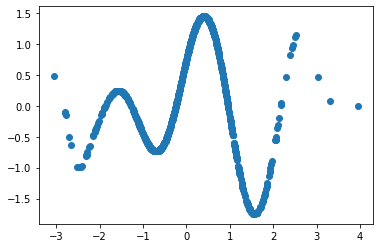

In [6]:
rbf = RBF(xB, fB, 100, 0.5)
fBhat = rbf.predict(xB)
plt.scatter(xB,fBhat)

## Vector field approximation

### Linear

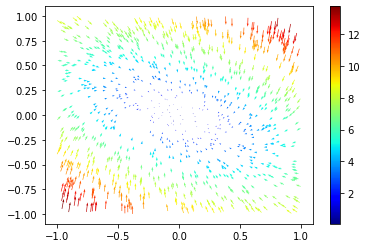

In [7]:
x0 = np.genfromtxt('linear_vectorfield_data_x0.txt')
x1 = np.genfromtxt('linear_vectorfield_data_x1.txt')
dt = 0.01
v = (x1 - x0)/dt
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], np.linalg.norm(v,axis=1),cmap='jet')
plt.colorbar()

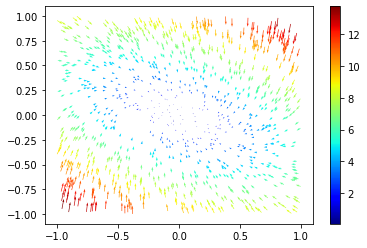

In [8]:
A = lstsq_opt(x0, v)
vhat = x0@A
plt.quiver(x0[:,0], x0[:,1], vhat[:,0], vhat[:,1], np.linalg.norm(vhat,axis=1),cmap='jet')
plt.colorbar()

In [9]:
x = x0
T = 0.1
t = 0
while t < T-0.000001:
    x += x@A*dt
    t += dt
x1hat = x
MSE(x1hat, x1)

0.17143955443220524

### Non-linear

In [11]:
x0 = np.genfromtxt('nonlinear_vectorfield_data_x0.txt')
x1 = np.genfromtxt('nonlinear_vectorfield_data_x1.txt')
dt = 1.
v = (x1 - x0)/dt

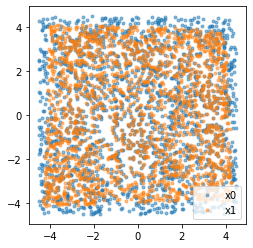

In [12]:
plt.scatter(x0[:,0], x0[:,1],marker='.', label='x0',alpha=0.5)
plt.scatter(x1[:,0], x1[:,1],marker='.', label='x1', alpha=0.5)
plt.gca().set_aspect('equal')
plt.legend()

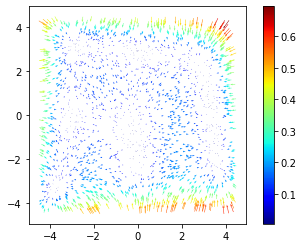

In [13]:
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], np.linalg.norm(v,axis=1),cmap='jet')
plt.gca().set_aspect('equal')
plt.colorbar()

In [14]:
A = lstsq_opt(x0, v)

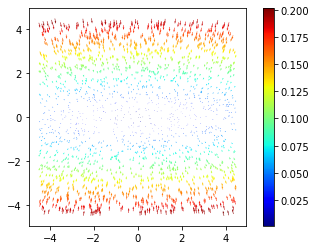

In [15]:
vhat = x0@A
plt.quiver(x0[:,0], x0[:,1], vhat[:,0], vhat[:,1], np.linalg.norm(vhat,axis=1),cmap='jet')
plt.gca().set_aspect('equal')
plt.colorbar()

In [1]:
rbf = RBF(x0, v, 500, 2)
vhat = rbf.predict(x0).T
plt.quiver(x0[:,0], x0[:,1], vhat[:,0], vhat[:,1], color=np.linalg.norm(vhat,axis=1),cmap='jet')
plt.gca().set_aspect('equal')
plt.colorbar()
MSE(x0+vhat, x1)

NameError: name 'RBF' is not defined

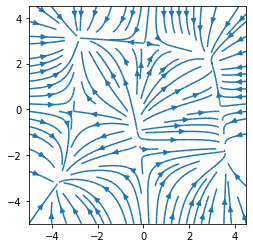

In [17]:
X, Y = np.meshgrid(np.arange(-5,5, .5), np.arange(-5,5,.5))
XY = np.array([X.flatten(), Y.flatten()]).T
UV = rbf.predict(XY)
U, V = [W.reshape(X.shape) for W in UV]
plt.streamplot(X, Y, U, V)
plt.gca().set_aspect('equal')


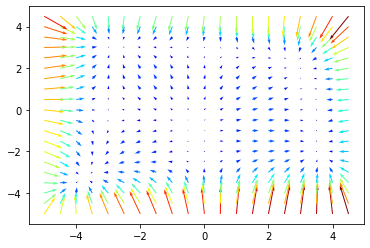

In [18]:
plt.quiver(X, Y, U, V, np.linalg.norm(UV.T,axis=1),cmap='jet')
plt.gca().set_aspect('equal')


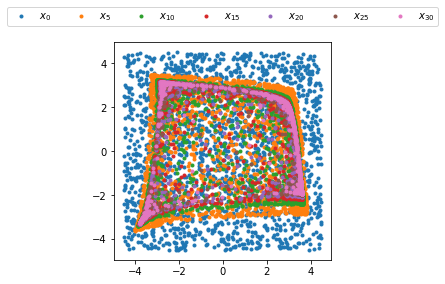

In [19]:
x = x0.copy()
plt.scatter(x[:,0], x[:,1], marker='.', label=r'$x_0$')
for i in range(1,31):
    vhat = rbf.predict(x).T
    x += vhat*dt
    if(not i%5):
        plt.scatter(x[:,0], x[:,1], marker='.', label=rf'$x_{{{i}}}$')
plt.gca().set_aspect('equal')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=7)